In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
raw_data = pd.read_csv('data/raw_data.csv')
print("Total number:", raw_data.shape[0])
print("Number of columns:", raw_data.shape[1])
dep_del15_counts = raw_data['DEP_DEL15'].value_counts()
print(f"Counts of each value in 'DEP_DEL15':\n{dep_del15_counts}")

Total number: 42636
Number of columns: 31
Counts of each value in 'DEP_DEL15':
DEP_DEL15
0    34564
1     8072
Name: count, dtype: int64


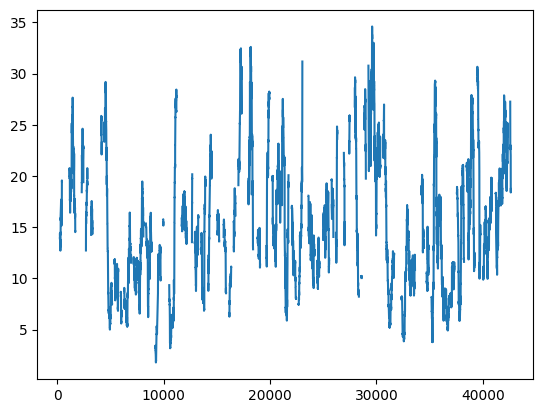

In [24]:
data_target = raw_data['ARR_DELAY_NEW']
# Compute moving average
moving_average = data_target.rolling(window=240).mean()

# Plot the moving average
plt.plot(moving_average)
plt.show()

In [9]:
8072/(34564+8072)

0.18932357632048036

In [3]:
rnn = pd.read_csv('result/rnn.csv')
hybrid_rnn = pd.read_csv('result/hybrid_rnn.csv')
GRUs = pd.read_csv('result/GRUs.csv')
hybrid_GRUs = pd.read_csv('result/hybrid_GRUs.csv')
LSTM = pd.read_csv('result/lstm.csv')
hybrid_LSTM = pd.read_csv('result/hybrid_lstm.csv')

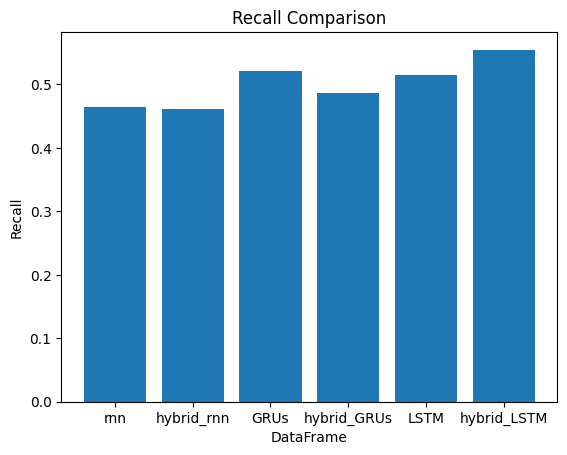

In [5]:
recall_values = [df.loc[1, 'recall'] for df in [rnn, hybrid_rnn, GRUs, hybrid_GRUs, LSTM, hybrid_LSTM]]

plt.bar(['rnn', 'hybrid_rnn', 'GRUs', 'hybrid_GRUs', 'LSTM', 'hybrid_LSTM'], recall_values)
plt.xlabel('DataFrame')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.show()